## Lorgistic Regression Prediction Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn import preprocessing, pipeline, metrics, model_selection
from sklearn.model_selection import GridSearchCV

pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 100 
sns.set_style("white")
%matplotlib inline

In [2]:
# read input 
full_concat_df = pd.read_csv("features_lr_model.csv", index_col=[0])

fico_range_high_bin var induced the singular matrix. so not used for lr prediciton

In [3]:
select_vars= [ 
'tax_liens_le_0',
 'tax_liens_le_1',
 'tax_liens_le_2',
 'tax_liens_le_3',
 'tax_liens_le_4',
 'home_ownership_le_0',
 'home_ownership_le_1',
'verification_status_le_0',
 'verification_status_le_1',
 'emp_length_impute_num_-999',
 'emp_length_impute_num_1',
 'emp_length_impute_num_2',
 'emp_length_impute_num_3',
 'emp_length_impute_num_4',
 'emp_length_impute_num_5',
 'emp_length_impute_num_6',
 'emp_length_impute_num_7',
 'emp_length_impute_num_8',
 'emp_length_impute_num_9',
    'emp_title_truncated_impute_le_0',
 'emp_title_truncated_impute_le_1',
 'emp_title_truncated_impute_le_2',
 'emp_title_truncated_impute_le_3',
 'emp_title_truncated_impute_le_4',
 'emp_title_truncated_impute_le_5',
 'emp_title_truncated_impute_le_6',
 'emp_title_truncated_impute_le_7',
 'emp_title_truncated_impute_le_8',
 'emp_title_truncated_impute_le_9',
 'emp_title_truncated_impute_le_10',
 'emp_title_truncated_impute_le_11',
 'emp_title_truncated_impute_le_12',
 'emp_title_truncated_impute_le_13',
 'emp_title_truncated_impute_le_14',
 'emp_title_truncated_impute_le_15',
 'emp_title_truncated_impute_le_16',
 'emp_title_truncated_impute_le_17',
 'emp_title_truncated_impute_le_18',
     'zip_code_truncated_le_0',
 'zip_code_truncated_le_1',
 'zip_code_truncated_le_2',
 'zip_code_truncated_le_3',
 'zip_code_truncated_le_4',
 'zip_code_truncated_le_5',
 'zip_code_truncated_le_6',
 'zip_code_truncated_le_7',
 'zip_code_truncated_le_8',
 'zip_code_truncated_le_9',
 'zip_code_truncated_le_10',
 'zip_code_truncated_le_11',
 'zip_code_truncated_le_12',
 'zip_code_truncated_le_13',
 'zip_code_truncated_le_14',
 'zip_code_truncated_le_15',
 'zip_code_truncated_le_16',
 'zip_code_truncated_le_17',
 'zip_code_truncated_le_18',
 'zip_code_truncated_le_19',
 'zip_code_truncated_le_20',
 'zip_code_truncated_le_21',
 'zip_code_truncated_le_22',
 'zip_code_truncated_le_23',
 'zip_code_truncated_le_24',
 'zip_code_truncated_le_25',
 'zip_code_truncated_le_26',
 'zip_code_truncated_le_27',
 'zip_code_truncated_le_28',
 'zip_code_truncated_le_29',
 'zip_code_truncated_le_30',
 'zip_code_truncated_le_31',
 'zip_code_truncated_le_32',
 'zip_code_truncated_le_33',
 'zip_code_truncated_le_34',
 'zip_code_truncated_le_35',
 'zip_code_truncated_le_36',
 'zip_code_truncated_le_37',
 'zip_code_truncated_le_38',
 'zip_code_truncated_le_39',
 'zip_code_truncated_le_40',
 'zip_code_truncated_le_41',
 'zip_code_truncated_le_42',
 'zip_code_truncated_le_43',
 'zip_code_truncated_le_44',
 'zip_code_truncated_le_45',
 'zip_code_truncated_le_46',
 'zip_code_truncated_le_47',
 'zip_code_truncated_le_48',
 'zip_code_truncated_le_49',
 'zip_code_truncated_le_50',
 'zip_code_truncated_le_51',
 'zip_code_truncated_le_52',
 'zip_code_truncated_le_53',
 'zip_code_truncated_le_54',
 'zip_code_truncated_le_55',
 'zip_code_truncated_le_56',
 'zip_code_truncated_le_57',
 'zip_code_truncated_le_58',
 'zip_code_truncated_le_59',
 'zip_code_truncated_le_60',
 'zip_code_truncated_le_61',
 'zip_code_truncated_le_62',
 'zip_code_truncated_le_63',
 'zip_code_truncated_le_64',
 'zip_code_truncated_le_65',
 'zip_code_truncated_le_66',
 'zip_code_truncated_le_67',
 'zip_code_truncated_le_68',
 'zip_code_truncated_le_69',
 'zip_code_truncated_le_70',
 'zip_code_truncated_le_71',
 'zip_code_truncated_le_72',
 'zip_code_truncated_le_73',
 'zip_code_truncated_le_74',
 'zip_code_truncated_le_75',
 'zip_code_truncated_le_76',
 'zip_code_truncated_le_77',
 'zip_code_truncated_le_78',
 'zip_code_truncated_le_79',
 'zip_code_truncated_le_80',
 'zip_code_truncated_le_81',
 'zip_code_truncated_le_82',
 'zip_code_truncated_le_83',
 'zip_code_truncated_le_84',
 'zip_code_truncated_le_85',
 'zip_code_truncated_le_86',
 'zip_code_truncated_le_87',
 'zip_code_truncated_le_88',
 'zip_code_truncated_le_89',
 'zip_code_truncated_le_90',
 'zip_code_truncated_le_91',
 'zip_code_truncated_le_92',
 'zip_code_truncated_le_93',
 'term_encode_0',
 'purpose_le_0',
 'purpose_le_1',
 'purpose_le_2',
 'purpose_le_3',
 'purpose_le_4',
 'purpose_le_5',
 'purpose_le_6',
 'purpose_le_7',
 'purpose_le_8',
 'purpose_le_9',
 'purpose_le_10',
 'purpose_le_11',
 'pub_bankrupt_zero_record',
 'dti_bin_encode_1_qrt',
 'dti_bin_encode_2_qrt',
 'dti_bin_encode_3_qrt',
 'loan_amnt_bin_encode_1_qrt',
 'loan_amnt_bin_encode_2_qrt',
 'loan_amnt_bin_encode_3_qrt',
'annual_inc_bin_encode_1_qrt',
 'annual_inc_bin_encode_2_qrt',
 'annual_inc_bin_encode_3_qrt',
 'loan_income_ratio_bin_encode_1_qrt',
 'loan_income_ratio_bin_encode_2_qrt',
 'loan_income_ratio_bin_encode_3_qrt',
     'fico_range_low_bin_encode_1_qrt',
 'fico_range_low_bin_encode_2_qrt',
 'fico_range_low_bin_encode_3_qrt'
]

In [4]:
#full_concat_df = full_concat_df.drop(referece_dummies_var+removed_dummies_var, axis=1)
full_concat_df = full_concat_df[select_vars+['target']]

### Logistic Model Prediction and Performance Evaluation 

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
np.random.seed(4684)

#split into train and test to avoid overfitting



X_train, X_test, y_train, y_test = train_test_split(full_concat_df.drop(['target'],axis=1), full_concat_df['target'], stratify=full_concat_df['target'], test_size=0.2, random_state=42)


Logistic regression model with p-val for each feature

In [6]:

import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
#         print(f"rank Fij shape {np.shape(F_ij)}: {np.linalg.matrix_rank(F_ij)}")
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [7]:
reg = LogisticRegression_with_p_values(max_iter=10000)
reg.fit(X_train, y_train)

In [8]:
feature_name = X_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

In [9]:
# This is a list.
p_values = reg.p_values

In [10]:
# Add the intercept for completeness.
# We add the value 'NaN' in the beginning of the variable with p-values.
p_values = np.append(np.nan, np.array(p_values))

In [11]:
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table['p_values'] = p_values


In [46]:
summary_table[summary_table['Feature name'].isin(['loan_amnt_bin_encode_1_qrt',
 'loan_amnt_bin_encode_2_qrt',
 'loan_amnt_bin_encode_3_qrt'])]

,Feature name,Coefficients,p_values
150,loan_amnt_bin_encode_1_qrt,0.054904,0.802777
151,loan_amnt_bin_encode_2_qrt,-0.164218,0.345741
152,loan_amnt_bin_encode_3_qrt,-0.235881,0.064308


In [45]:
summary_table[(summary_table['p_values']<0.05) & (abs(summary_table['Coefficients'])>0.3)]

,Feature name,Coefficients,p_values
8,verification_status_le_0,-0.319783,5.123037e-03
14,emp_length_impute_num_4,-0.377606,3.520080e-02
113,zip_code_truncated_le_74,0.738661,4.394387e-02
133,term_encode_0,-1.092288,2.283372e-29
153,annual_inc_bin_encode_1_qrt,0.406277,2.736443e-02
156,loan_income_ratio_bin_encode_1_qrt,-0.455238,2.579204e-02
159,fico_range_low_bin_encode_1_qrt,0.793055,2.011521e-10
160,fico_range_low_bin_encode_2_qrt,0.669671,1.093700e-08
161,fico_range_low_bin_encode_3_qrt,0.475555,8.685036e-05


In [30]:
summary_table[summary_table['p_values']<0.05]

,Feature name,Coefficients,p_values
6,home_ownership_le_0,0.257277,5.498044e-03
8,verification_status_le_0,-0.319783,5.123037e-03
14,emp_length_impute_num_4,-0.377606,3.520080e-02
113,zip_code_truncated_le_74,0.738661,4.394387e-02
133,term_encode_0,-1.092288,2.283372e-29
153,annual_inc_bin_encode_1_qrt,0.406277,2.736443e-02
156,loan_income_ratio_bin_encode_1_qrt,-0.455238,2.579204e-02
159,fico_range_low_bin_encode_1_qrt,0.793055,2.011521e-10
160,fico_range_low_bin_encode_2_qrt,0.669671,1.093700e-08
161,fico_range_low_bin_encode_3_qrt,0.475555,8.685036e-05


Confusion matrix

In [13]:
y_predict = reg.model.predict(X_test)
confusion_matrix(y_test, y_predict)
pd_confusion_matrix = pd.DataFrame(data = confusion_matrix(y_test, y_predict), columns=['Predicted Not charge-off', 'Predicted Charge-off'], index=['Not Chargeoff', 'Charge-off'])
pd_confusion_matrix

,Predicted Not charge-off,Predicted Charge-off
Not Chargeoff,1093,6
Charge-off,217,2


#### Model performance evaluation

roc_auc score 

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.664


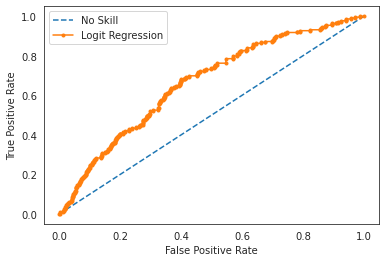

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pylab as plt

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
# predict probabilities
lr_predict_prob = reg.model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_predict_prob[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the mode
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logit Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

gini coefficient and kolmogorov-smirnov are common used in credit-risk industry

In [15]:
y_hat_test_proba =reg.model.predict_proba(X_test)

In [16]:
y_hat_test_proba_char_off = y_hat_test_proba[:,1]

In [17]:
df_test_y = pd.DataFrame(y_test)
df_test_y.reset_index(drop = True, inplace = True)

In [18]:
df_t_test_prob = pd.DataFrame(y_hat_test_proba_char_off)

In [19]:
df_actual_predicted_probs = pd.concat([df_test_y, df_t_test_prob], axis = 1,ignore_index=False)


In [20]:
df_actual_predicted_probs.index = X_test.index

In [21]:

df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [22]:
df_probs_threashold = df_actual_predicted_probs.sort_values('y_hat_test_proba',ascending=False)


In [23]:
df_probs_threashold = df_probs_threashold.reset_index(drop=True)

In [24]:
# check the prob_threashold of charge-off

df_probs_threashold['Cumulative N Population'] = df_probs_threashold.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_probs_threashold['Cumulative N Charge-off'] = df_probs_threashold['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_probs_threashold['Cumulative N Good'] = df_probs_threashold['Cumulative N Population'] - df_probs_threashold['loan_data_targets_test'].cumsum()



In [25]:
df_probs_threashold['Cumulative Perc Population'] = df_probs_threashold['Cumulative N Population'] / (df_probs_threashold.shape[0])
# We calculate the cumulative percentage of all observations.
df_probs_threashold['Cumulative Perc Charge-off'] = df_probs_threashold['Cumulative N Charge-off'] / df_probs_threashold['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_probs_threashold['Cumulative Perc Good'] = df_probs_threashold['Cumulative N Good'] / (df_probs_threashold.shape[0] - df_probs_threashold['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

Text(0.5, 1.0, 'Gini')

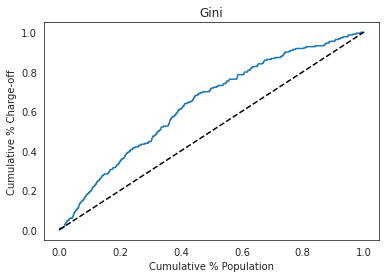

In [26]:
# Plot Gini
plt.plot(df_probs_threashold['Cumulative Perc Population'], df_probs_threashold['Cumulative Perc Charge-off'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_probs_threashold['Cumulative Perc Population'], df_probs_threashold['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Charge-off')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [27]:
gini_coef = 2*lr_auc-1
gini_coef

0.32857599893635125

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

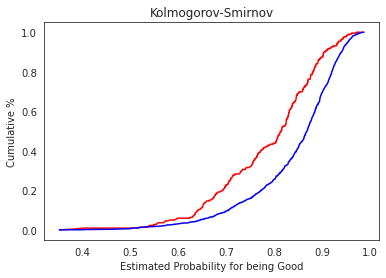

In [28]:
# Plot KS
plt.plot(1-df_probs_threashold['y_hat_test_proba'], df_probs_threashold['Cumulative Perc Charge-off'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'charge-off' along the y-axis,
# colored in red.
plt.plot(1-df_probs_threashold['y_hat_test_proba'], df_probs_threashold['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [29]:
KS = max(df_probs_threashold['Cumulative Perc Charge-off'] - df_probs_threashold['Cumulative Perc Good'])
KS

0.28000132956070484

### The Linear Regression Classifier Performance Summeries
- LR model has roc_ruc 0.664
- The Gini coefficient is 0.329
- The max diff in Kolmogrov-Smirnov curve is 0.280